In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Problem 1
##### For the districts you selected for budget cuts in HW 3 Problem 4, calculate and visualize the proportion of each district’s total funding that will be lost. Which districts will be affected by your budget cuts the most?

In [2]:
Cuts = pd.read_csv('./Data/cuts.csv', low_memory=False)

In [3]:
Cuts['perc_tot'] = Cuts['cutAmount']/Cuts['TOTALREV'] 

####  Below is the list of top 10 districts affected by budget cut.

In [4]:
Cuts\
.sort_values(by = 'perc_tot', ascending = False)\
[['LEAID', 'NAME','STNAME','cutAmount','TOTALREV','perc_tot']]\
.head(n=10)

,LEAID,NAME,STNAME,cutAmount,TOTALREV,perc_tot
0,5000007,Barre Supervisory Union,Vermont,1.990760e+06,5209000,0.382177
1,3500158,WALATOWA CHARTER HIGH,New Mexico,6.229854e+05,1890000,0.329622
2,400403,Akimel O'Otham Pee Posh Charter School Inc. 1,Arizona,1.187008e+05,385000,0.308314
3,5300013,Educational Service District 105,Washington,7.298161e+06,23709000,0.307822
4,4800164,REG 14 EDUCATION SERVICE CENTER,Texas,5.873751e+06,20254000,0.290005
5,1600163,CHIEF TAHGEE ELEMENTARY ACADEMY DISTRICT,Idaho,6.059173e+05,2100000,0.288532
6,4800176,REG 9 EDUCATION SERVICE CENTER,Texas,3.596713e+06,12703000,0.283139
7,400351,Kaizen Education Foundation dba Vista Grove Pr...,Arizona,2.048171e+05,737000,0.277907
8,3004500,Box Elder H S,Montana,8.549563e+05,3081000,0.277493
9,5099931,North Country Supervisory Union,Vermont,2.648658e+06,9573000,0.276680


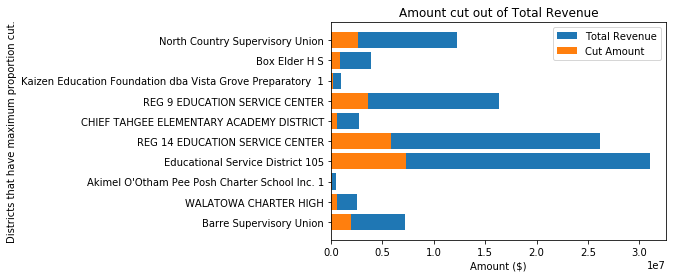

In [5]:
cut_plot = Cuts.sort_values(by = 'perc_tot', ascending = False).head(n=10)
plt.barh(cut_plot.NAME, 
         cut_plot.TOTALREV,left = cut_plot.cutAmount, label='Total Revenue')

plt.barh(cut_plot.NAME, 
         cut_plot.cutAmount, label='Cut Amount')

plt.ylabel("Districts that have maximum proportion cut.")
plt.xlabel("Amount ($)")
plt.legend(loc="upper right")
plt.title("Amount cut out of Total Revenue")

plt.show()

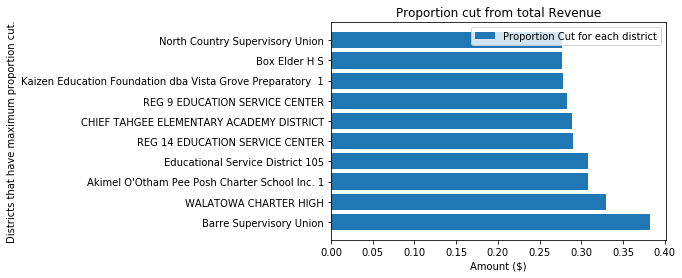

In [6]:
plt.barh(cut_plot.NAME, 
         cut_plot.perc_tot, label= 'Proportion Cut for each district')

plt.ylabel("Districts that have maximum proportion cut.")
plt.xlabel("Amount ($)")
plt.legend(loc="upper right")
plt.title("Proportion cut from total Revenue")

plt.show()

##### We can observe maximum cut proportion is 0.38 that is 38%. Barre Supervisory union is most affected by budget cut. 

In [7]:
demographics = pd.read_csv('./Data/ccd_lea_052_1516_w_1a_011717.csv', low_memory=False)
demographics.LEAID = demographics.LEAID.astype('str')

### Problem 2
#### A common problem with purely data-driven solutions is that they can inadvertently perpetuate hidden pre-existing biases in the data, and further disadvantage groups that are already disadvantaged. Calculate the proportion of enrolled students by race for each district, then visualize the distributions of these for districts that received budget cuts versus districts that did not receive budget cuts.

In [8]:
district_prop = demographics[['LEAID']][demographics['TOTAL'] >= 0].copy()

district_prop['American Indian/Alaska Native'] = demographics['AM'] / demographics['TOTAL']
district_prop['Asian'] = demographics['AS'] / demographics['TOTAL']
district_prop['Hispanic'] = demographics['HI'] / demographics['TOTAL']
district_prop['Black'] = demographics['BL'] / demographics['TOTAL']
district_prop['White'] = demographics['WH'] / demographics['TOTAL']
district_prop['Hawaiian Native / Pacific Islander'] = demographics['HP'] / demographics['TOTAL']
district_prop['Two or More Races'] = demographics['TR'] / demographics['TOTAL']


district_prop.head()

,LEAID,American Indian/Alaska Native,Asian,Hispanic,Black,White,Hawaiian Native / Pacific Islander,Two or More Races
1,100005,0.002685,0.003260,0.439010,0.029152,0.502301,0.000767,0.022823
2,100006,0.004614,0.003017,0.205856,0.008873,0.768589,0.000355,0.008696
3,100007,0.000719,0.066930,0.072466,0.254565,0.584543,0.001006,0.019770
4,100008,0.006193,0.086105,0.043852,0.203976,0.617920,0.002697,0.039257
6,100011,0.001050,0.006824,0.126509,0.227297,0.602625,0.002625,0.033071


In [9]:
Cuts_demographics = Cuts[['LEAID']].merge(demographics[['LEAID','AM','AS','HI','BL','WH','HP','TR','TOTAL']], how = 'inner' ,on = 'LEAID')

# Removing negative values:
num = Cuts_demographics._get_numeric_data()
num[num < 0] = 0

Race_count = pd.DataFrame(Cuts_demographics[['AM','AS','HI','BL','WH','HP','TR']].sum()).rename(columns = {0:'Count'})

not_cut_demographics = Cuts[['LEAID']].merge(demographics[['LEAID','AM','AS','HI','BL','WH','HP','TR','TOTAL']], how='outer', indicator=True)

not_cut_demographics = not_cut_demographics[not_cut_demographics._merge == 'right_only']

# Removing negative values:
num = not_cut_demographics._get_numeric_data()
num[num < 0] = 0
Race_count_notcut = pd.DataFrame(not_cut_demographics[['AM','AS','HI','BL','WH','HP','TR']].sum()).rename(columns = {0:'Count'})

In [10]:
Races = {'AM': 'American Indian/Alaska Native',
 'AS': 'Asian',
 'HI': 'Hispanic',
 'BL': 'Black',
 'WH': 'White',
 'HP': 'Hawaiian Native / Pacific Islander',
 'TR': 'Two or More Races'}
Race_count = Race_count.rename(index = Races).reset_index().rename(columns = {'index':'Races'}) 
Race_count['Percent'] =   Race_count['Count']/Race_count['Count'].sum()*100

In [11]:
Race_count_notcut = Race_count_notcut.rename(index = Races).reset_index().rename(columns = {'index':'Races'}) 
Race_count_notcut['Percent'] =   Race_count_notcut['Count']/Race_count_notcut['Count'].sum()*100
Race_count_notcut

,Races,Count,Percent
0,American Indian/Alaska Native,286372.0,0.922366
1,Asian,1774324.0,5.714862
2,Hispanic,7365882.0,23.724527
3,Black,4310695.0,13.884176
4,White,16091223.0,51.827691
5,Hawaiian Native / Pacific Islander,147183.0,0.474057
6,Two or More Races,1071861.0,3.452322


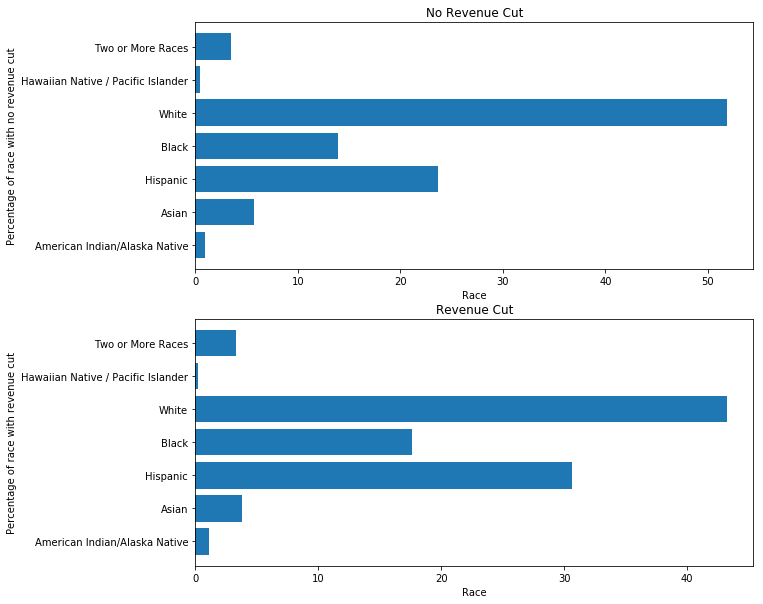

In [12]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.barh(Race_count_notcut.Races,Race_count_notcut.Percent)
plt.title('No Revenue Cut')
plt.xlabel('Race')
plt.ylabel('Percentage of race with no revenue cut')
plt.subplot(2,1,2)
plt.barh(Race_count.Races,Race_count.Percent)
plt.title('Revenue Cut')
plt.xlabel('Race')
plt.ylabel('Percentage of race with revenue cut')
plt.show()

#### Comment on whether the the distributions appear to be the same or different. Did your selection include any hidden biases, or manage to avoid them?

* An implicit bias is observed in Hispanic students enrolled as percentage of Hispanic students in district that lost revenue is 30% where as enrollment in districts that havent lost funding has 23% enrollment of Hispanic students. Most of the distribution is quite similar for the districts that would lose revenue as supposed to districts that would not face cut in the revenue. 

* We can observe a little negative bias in the solution towards hispanic students however it is minimal.

### Problem 3
#### Calculate the proportion of enrolled students by disability status (students with an IEP under IDEA) for each district, then visualize the distributions of these proportions for districts that received budget cuts versus districts that did not receive budget cuts.

In [13]:
disabilities = pd.read_csv('./Data/ccd_lea_002089_1516_w_1a_011717.csv', low_memory=False)
disabilities[['LEAID']] = disabilities['LEAID'].astype('str')

In [14]:
disabilities_prop = disabilities[['LEAID', 'SPECED']]\
                    .merge(demographics[['LEAID', 'TOTAL']])
disabilities_prop = Cuts[['LEAID']].merge(disabilities_prop, how='outer', indicator=True)
disabilities_prop = disabilities_prop[disabilities_prop.TOTAL.notna()]
disabilities_prop['disable_prop'] = disabilities_prop['SPECED']/disabilities_prop['TOTAL']
disabilities_prop.head()

,LEAID,SPECED,TOTAL,_merge,disable_prop
1,3500158,6.0,54.0,both,0.111111
2,400403,3.0,14.0,both,0.214286
5,1600163,26.0,101.0,both,0.257426
7,400351,8.0,61.0,both,0.131148
8,3004500,14.0,113.0,both,0.123894


In [15]:
overall_proportion = disabilities_prop.groupby('_merge').sum()
overall_proportion['disable_prop'] = overall_proportion['SPECED']/overall_proportion['TOTAL'] 
overall_proportion = overall_proportion.drop('left_only')\
                    .rename(index = {'both':'revenue_cut','right_only':'revenue_not_cut'})
overall_proportion['not_disable_prop'] = 1 - overall_proportion['disable_prop']
overall_proportion


,SPECED,TOTAL,disable_prop,not_disable_prop
_merge,,,,
revenue_not_cut,4134294.0,31049551.0,0.133151,0.866849
revenue_cut,2540898.0,19762259.0,0.128573,0.871427


In [16]:
plt_prop = overall_proportion[['disable_prop','not_disable_prop']].stack().reset_index().rename(columns = {'level_1':'disability',0:'prop'})

Text(0, 0.5, 'Proportion of disabled students with no revenue cut')

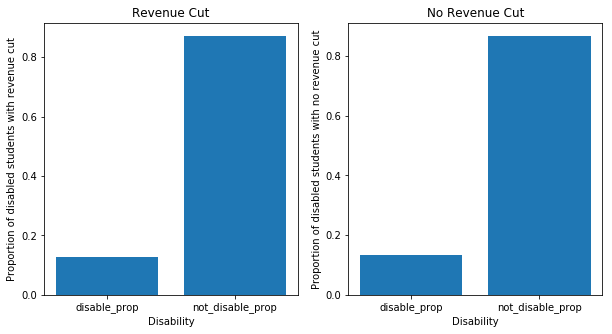

In [17]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Revenue Cut')

plt.bar(plt_prop[plt_prop._merge == 'revenue_cut'].disability,
        plt_prop[plt_prop._merge == 'revenue_cut'].prop)

plt.xlabel('Disability')
plt.ylabel('Proportion of disabled students with revenue cut')
plt.subplot(1,2,2)


plt.bar(plt_prop[plt_prop._merge == 'revenue_not_cut'].disability,
        plt_prop[plt_prop._merge == 'revenue_not_cut'].prop)

plt.title('No Revenue Cut')
plt.xlabel('Disability')
plt.ylabel('Proportion of disabled students with no revenue cut')



#### Comment on whether the the distributions appear to be the same or different. Did your selection include any hidden biases, or manage to avoid them?

* The distribution for proportion of disabled and not disable student is very similar in both the cases. Hence, the results are not biased towards disbled students negatively or positively.

### Problem 4

#### Choose and critique one of your fellow classmates’ selection of schools for budget cuts in HW 3 Problem 4 and Problem 5. What was the justification of their selection? Discuss any advantages or disadvantages of their approach.

* I would critique on Prathwish Shetty's Answer:
https://colab.research.google.com/drive/1TD7hQ2NMVWYvLg7bIZv0ay46fOoOhfpi#scrollTo=IxYCQg8UrCCZ

* Prathwish chose to do multi-level funding cut. Students with lower scores gets a lower cut in revenue.

* Pros:
    * The method promotes to push education standards for lower performing school. It does make sense that more resources should be put on low performing students to bring them up to average level. So cutting their revenues could impact negatively.
    
* Cons: 
    * However, I feel monetary funds could not be the only reason. There could be other factors too. Also, if the students are performing exceptionally well their schools' revenue would get a cut that could affect the schools in debt with students performing well. This method could be unfair for those students and schools working really hard. 
    
* Suggestion: 
    * Scores and proficiency in subjects could be one of the factors to be considered. Aditionally, total revenue and debt could be also considered so that the schools aren't negatively affected. 

### Problem 5
#### Summarize and comment on what you learned from one the special topics lectures (MapReduce + Hadoop, Visualization, Causal Inference, or the Industry Panel) of your choice.

#### INDUSTRY PANEL
* The industry panel which included Faye Zheng (Gamalon), Michelle Tat (Haven Healthcare), Daniel Hannah (Vectra AI), Katie Porter (Tamr) and Luke Winslow (Wayfair) was very helpful as they discussed more about the industry. How the different roles are they are not called Data Science roles however they do have work relavent to Data Science. They emphasized on the critical points we need to keep mind during the process of job search. The panel also discussed their own journey and career paths about their PHDs. DS 5500 being the last course of the program having panel on one of the lecture days is very helpful as we are looking towards finding new jobs or decideing wether to go for PHD or not. 

* This lecture was very benificial as it gave first hand information from people in industry who have been in Academia for a while also as some of them were Post Docs. 